In [ ]:
# Code from here:
# https://pyvia.readthedocs.io/en/latest/notebooks/ViaJupyter_Toy_Multifurcating.html

from pyVIA.core import *
import pyVIA.datasets_via as datasets_via
import pandas as pd 
import scanpy as sc
# Settings the warnings to be ignored 
import warnings 
warnings.filterwarnings('ignore') 

c:\Users\User\miniconda3\envs\rna\lib\site-packages\phate\__init__.py


In [2]:
adata_counts = datasets_via.toy_multifurcating()
print(adata_counts)
true_label = adata_counts.obs['group_id'].tolist()
ncomps = 30
sc.tl.pca(adata_counts, svd_solver='arpack', n_comps=ncomps)

2025-03-26 15:06:42.490015	Start downloading data...
2025-03-26 15:06:42.770536	Finished downloading data. Saved to ./toy_multifurcating_M8_n1000d1000.csv
AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'group_id', 'true_time'


In [3]:
#define parameters
ncomps, knn, random_seed, dataset, root_user, memory  =30,20, 42,'toy', ['M1'], 20

v0 = VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, edgepruning_clustering_resolution=0.15, edgepruning_clustering_resolution_local=1,
             knn=knn, cluster_graph_pruning=1, too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='group',
             random_seed=random_seed,memory=memory)#, do_compute_embedding=True, embedding_type='via-atlas') #set these options if you wish to run the embedding during the TI computation. embedding_type = 'via-mds' is extremely fast, and useful for a "quick" view
v0.run_VIA()

2025-03-26 15:06:45.765188	Running VIA over input data of 1000 (samples) x 30 (features)
2025-03-26 15:06:45.765188	Knngraph has 20 neighbors
check
2025-03-26 15:06:45.932139	Finished global pruning of 20-knn graph used for clustering at level of 0.15. Kept 46.7 % of edges. 
2025-03-26 15:06:45.935628	Number of connected components used for clustergraph  is 1
2025-03-26 15:06:45.952768	Commencing community detection
2025-03-26 15:06:45.962275	Finished community detection. Found 43 clusters.
2025-03-26 15:06:45.962275	Merging 30 very small clusters (<10)
2025-03-26 15:06:45.963281	Finished detecting communities. Found 13 communities
labels [11  4  2 12  0  4  0  0 10  2  0  4  4  2 10  5  3  2  0  1  3  0  3 11
 12  2  9  0  7  9  2  1  0  2  2  0  0  7  0  9  7  4  4  9  2  0  3 12
 10  0  9  8  0  1  5  9  3  7 10  1  5  2  0  1  0  1  4  4  0  7  0  1
  1  1  1  4  7  4  4  0  3  1 11  1  0  7  3  0  3  5  3 10  6  1  1  6
  9  2 12  1  1  5  4  7  1  7  6  0  5  1  2  8  5  6 11  1 

  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
2025-03-26 15:07:05.939001	Identifying terminal clusters corresponding to unique lineages...
2025-03-26 15:07:05.939001	Closeness:[3, 4, 5, 6, 7, 8, 9, 10]
2025-03-26 15:07:05.939001	Betweenness:[3, 4, 6, 7, 8, 9, 10]
2025-03-26 15:07:05.939001	Out Degree:[0, 3, 4, 6, 7, 8, 9, 10]
2025-03-26 15:07:05.939001	Terminal clusters corresponding to unique lineages in this component are [4, 7, 8, 9, 10] 
2025-03-26 15:07:05.939001	Calculating lineage probability at memory 20


  0%|          | 0/1000 [00:00<?, ?it/s]

2025-03-26 15:07:09.076474	Cluster or terminal cell fate 4 is reached 251.0 times
2025-03-26 15:07:09.102345	Cluster or terminal cell fate 7 is reached 234.0 times
2025-03-26 15:07:09.123823	Cluster or terminal cell fate 8 is reached 493.0 times
2025-03-26 15:07:09.141895	Cluster or terminal cell fate 9 is reached 476.0 times
2025-03-26 15:07:09.159058	Cluster or terminal cell fate 10 is reached 246.0 times
hitting_times1 [ 3.575  0.508  5.443  0.147 10.     4.534  0.     6.279  7.687 10.
  5.637  2.921  1.251]
2025-03-26 15:07:09.161773	There are (5) terminal clusters corresponding to unique lineages {4: 'M6', 7: 'M2', 8: 'M5', 9: 'M4', 10: 'M8'}
2025-03-26 15:07:09.161773	Begin projection of pseudotime and lineage likelihood
from core.py:
      0    1    2        3         4         5    6    7         8    9  ...  \
0  0.0  0.0  0.0  0.00000  0.000000  7.085161  0.0  0.0  0.000000  0.0  ...   
1  0.0  0.0  0.0  4.23908  0.000000  0.000000  0.0  0.0  0.000000  0.0  ...   
2  0.0  0.0

tune edges False
hammer_bundle for edges hbnp[:,2] unique from plotting_via.py func plot_viagraph_
: [2.579 2.874 3.431 3.679 4.078 4.239 4.551 4.592 4.669 7.085 8.064   nan]
hammer_bundle for edges hbnp[:,2] unique from plotting_via.py func plot_viagraph_
: [2.579 2.874 3.431 3.679 4.078 4.239 4.551 4.592 4.669 7.085 8.064   nan]


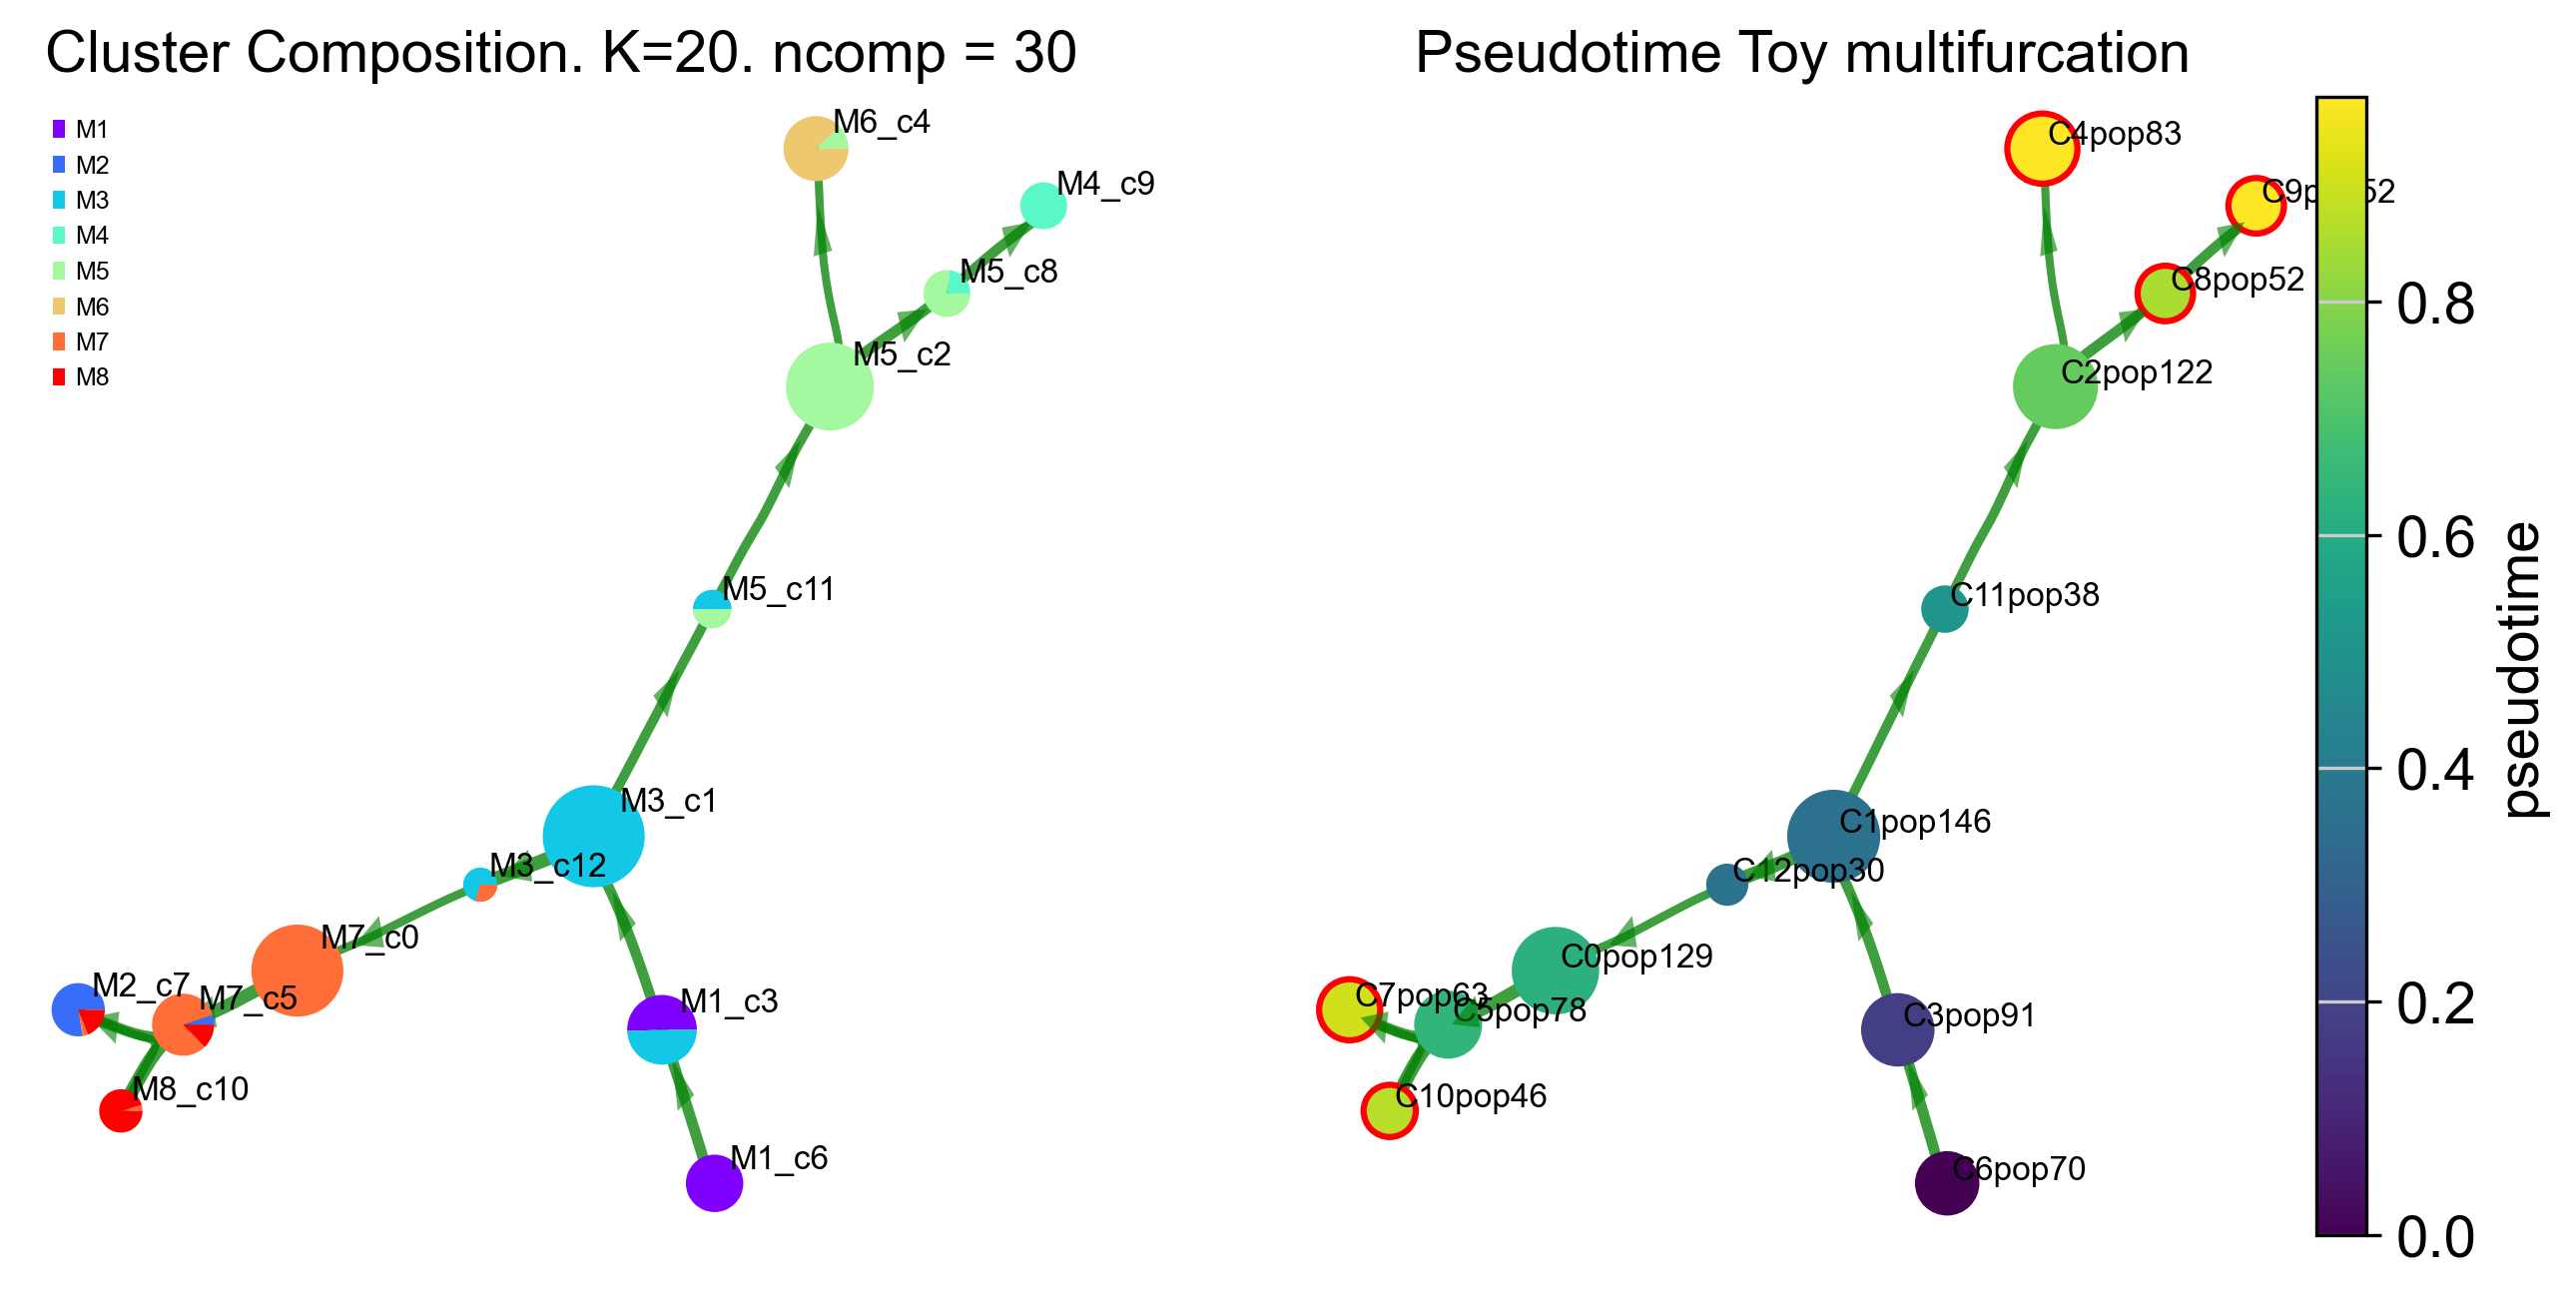

In [4]:
# draw the piechart clustergraph beside a clustergraph colored by the pseudotime ('pt') or gene expression ('gene').
# type_pt: 'pt' automatically takes the cluster level pseudotimes. 'gene' requires user to also pass gene_exp 
# gene_exp =''. In order to plot gene intensity, a list of cluster level gene/feature values should be provided as a list
# cmap = None. Can be specified and influences the cmap of the pt/gene graph
# ax_text = True. Can set to false if you don't want the cluster and populations labels 
# other features like edge width, color, alpha can be set here too
# Terminal lineage clusters have red outline (in rhs graph)
fig, ax, ax2= plot_piechart_viagraph(via_object=v0, type_data='pt', title='Toy multifurcation', cmap='viridis', ax_text=True, gene_exp='', alpha_edge=0.5, linewidth_edge=1.5, edge_color='green', headwidth_arrow=0.2)
fig.set_size_inches(10,5)

2025-03-26 15:07:23.445958	Commencing Via-MDS
2025-03-26 15:07:23.445958	Resetting n_milestones to 1000 as n_samples > original n_milestones
minrowznormed -0.030169163
2025-03-26 15:07:23.663065	Start computing with diffusion power:1
2025-03-26 15:07:23.674873	Starting MDS on milestone
2025-03-26 15:07:23.919589	End computing mds with diffusion power:1


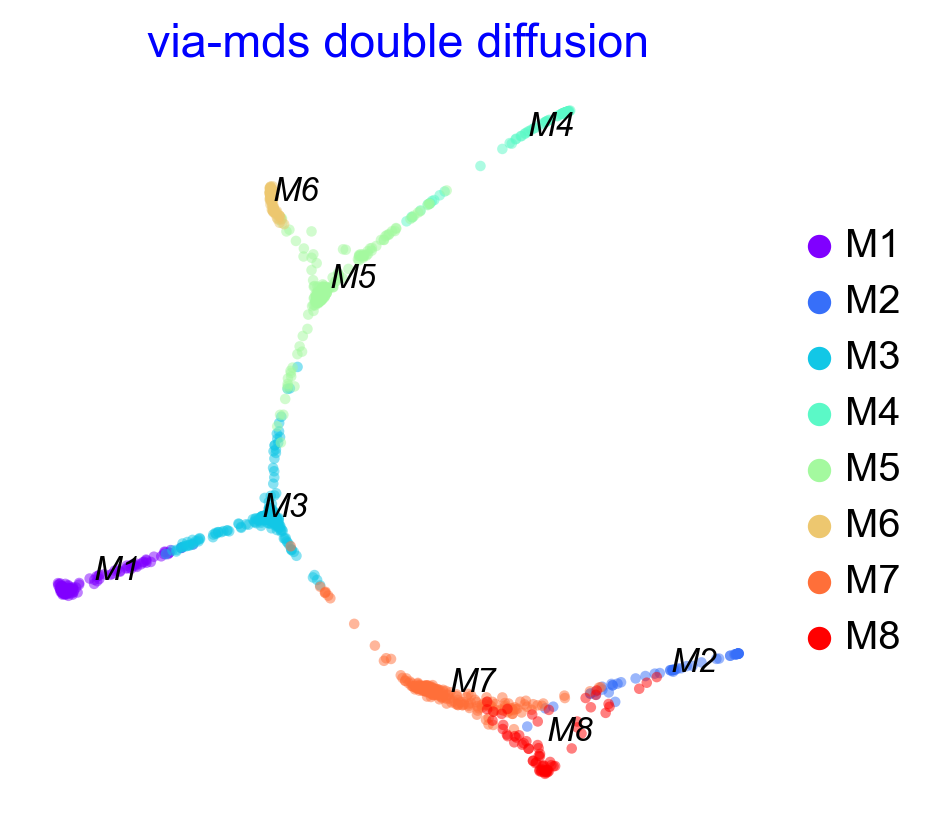

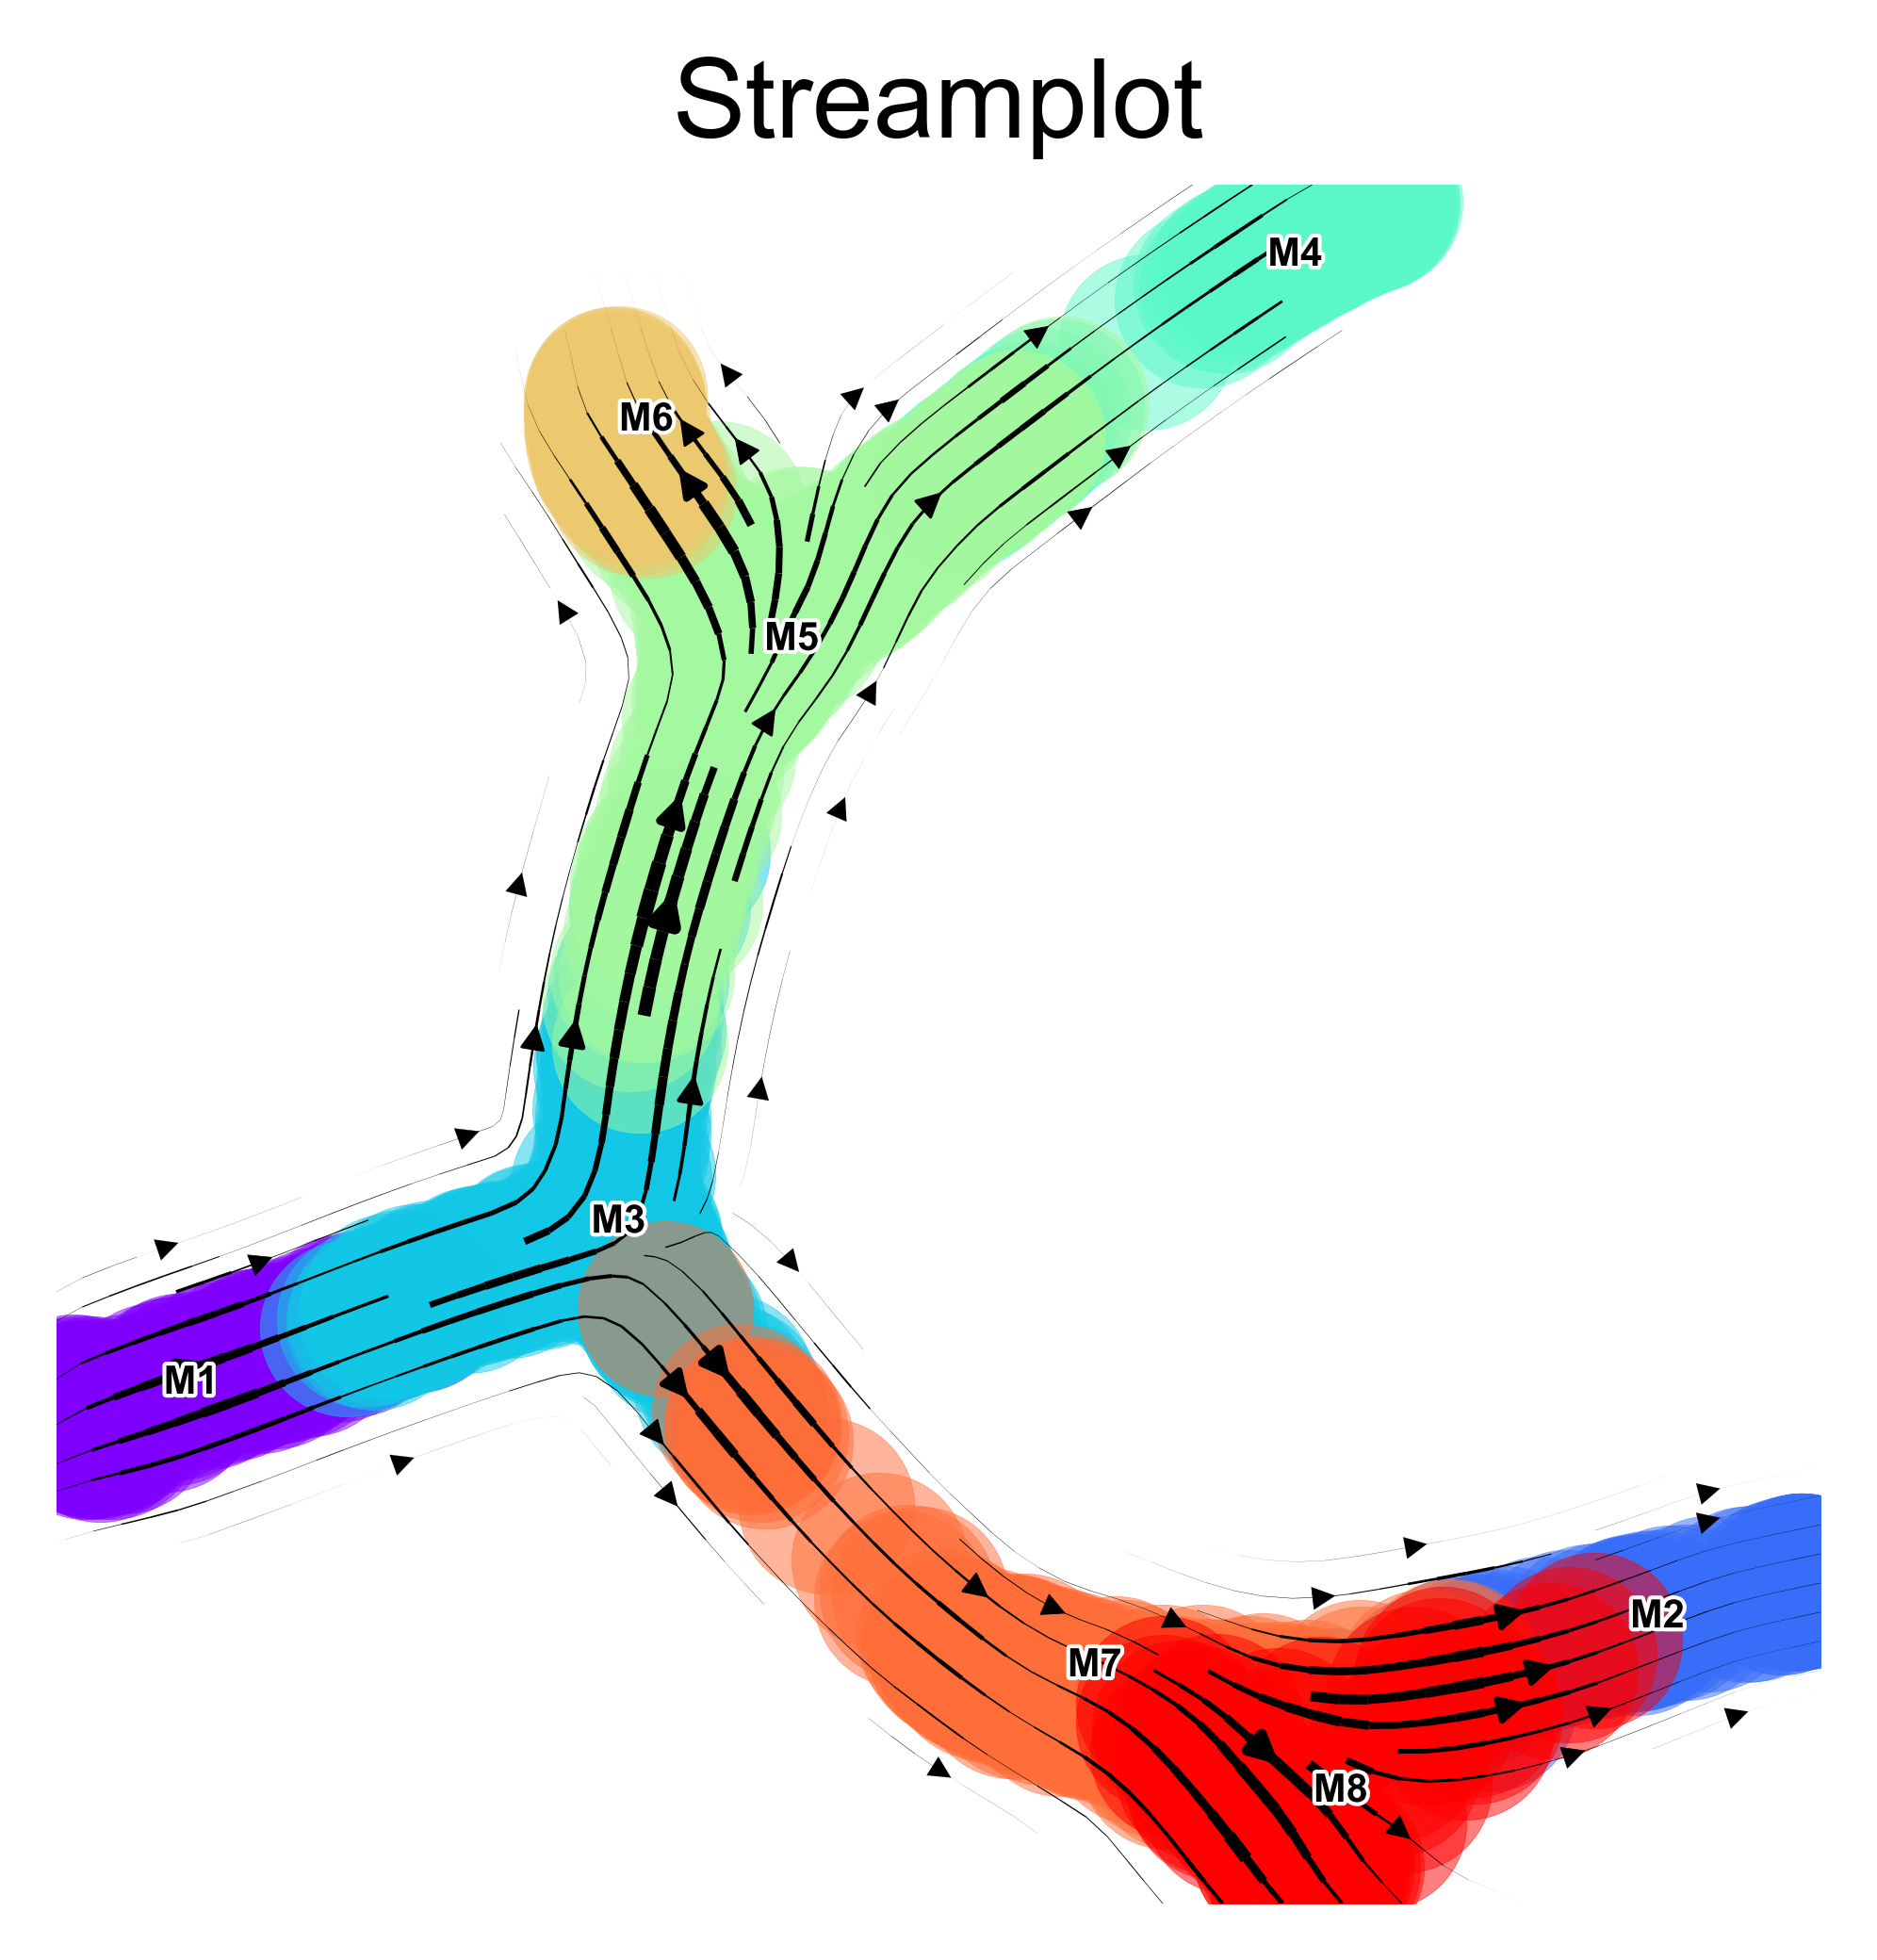

In [5]:
via_mds_embedding2 = via_mds(via_object=v0, double_diffusion = True)
f, ax = plot_scatter(embedding=via_mds_embedding2, labels=v0.true_label, s=10, alpha=0.5,title='via-mds double diffusion')

#default parameters:
# scatter_size=500
# scatter_alpha=0.5
# marker_edgewidth=0.1, outline of scatter points
# density_stream = 2, spacing between field lines
# smooth_transition=1,smoothing of transition matrix over neighbors of neighbors
# color_scheme = 'annotation', corresponds to true_labels  (cell types) provided. Can also be set to 'cluster' and 'time' and 'other'
# add_outline_clusters=False
# other_labels = [] provide a list of values for each cell corresponding to the value / annotation you wish to plot
v0.embedding = via_mds_embedding2
f, ax = via_streamplot(v0)
f.set_size_inches(4,4)